In [1]:
import sys; sys.path.append("../src")
from datasets import load_dataset
import numpy as np
from data import DataLoader
from layers import Linear, Module, Dropout
from activations import relu, softmax
from losses import CategoricalCrossEntropy
from optimizers import Adam
from data import DataLoader
from utils import Trainer
from metrics import categoricalAccuracy
import matplotlib.pyplot as plt

In [2]:
mnist = load_dataset("ylecun/mnist")

In [3]:
def onehot(label):
    out = np.zeros((10,))
    out[label] = 1
    return out

train_data = DataLoader(
    inputs = [ np.array(mnist["train"][i]["image"]).flatten()/255.0 for i in range(500) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(500) ],
    batch_size = 32
)

val_data = DataLoader(
    inputs = [ np.array(mnist["train"][i]["image"]).flatten()/255.0 for i in range(2000, 2250) ],
    labels = [ onehot(mnist["train"][i]["label"]) for i in range(2000, 2250) ],
    batch_size = 1
)

---

In [4]:
class MNISTDenseClassifier1(Module):
    def __init__(self):
        self.linear1 = Linear(784, 16, initializer="he")
        self.linear2 = Linear(16, 10, initializer="he")
    
    def __call__(self, x):
        x = self.linear1(x)
        x = relu(x)
        x = self.linear2(x)
        return softmax(x)

In [5]:
np.random.seed(42)
model = MNISTDenseClassifier1()
print("Total parameters:", np.sum([len(p) for p in model.parameters()]))

history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(15)

Total parameters: 12730


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0 | train_loss: 2.2244 train_accuracy: 0.1833 || val_loss: 2.1124 val_accuracy: 0.2840
Epoch 1 | train_loss: 1.9317 train_accuracy: 0.4417 || val_loss: 1.8543 val_accuracy: 0.4880
Epoch 2 | train_loss: 1.6286 train_accuracy: 0.5833 || val_loss: 1.6161 val_accuracy: 0.5960
Epoch 3 | train_loss: 1.3952 train_accuracy: 0.6687 || val_loss: 1.4858 val_accuracy: 0.6080
Epoch 4 | train_loss: 1.1879 train_accuracy: 0.7208 || val_loss: 1.3151 val_accuracy: 0.6560
Epoch 5 | train_loss: 0.9951 train_accuracy: 0.7708 || val_loss: 1.1812 val_accuracy: 0.6760
Epoch 6 | train_loss: 0.8623 train_accuracy: 0.7875 || val_loss: 1.1277 val_accuracy: 0.6880
Epoch 7 | train_loss: 0.7350 train_accuracy: 0.8167 || val_loss: 1.0464 val_accuracy: 0.7120
Epoch 8 | train_loss: 0.6657 train_accuracy: 0.8313 || val_loss: 0.9966 val_accuracy: 0.7360
Epoch 9 | train_loss: 0.5934 train_accuracy: 0.8458 || val_loss: 0.9930 val_accuracy: 0.7400
Epoch 10 | train_loss: 0.5776 train_accuracy: 0.8521 || val_loss: 1.02

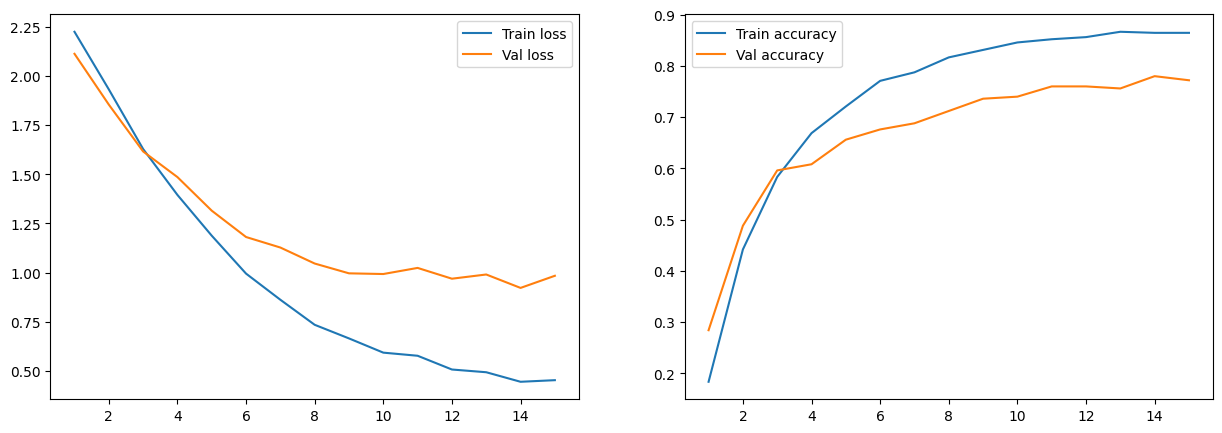

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()

---

In [7]:
class MNISTDenseClassifier2(Module):
    def __init__(self):
        self.linear1 = Linear(784, 16, initializer="he")
        self.dropout1 = Dropout(drop_prob=0.1)
        self.linear2 = Linear(16, 10, initializer="he")
    
    def __call__(self, x):
        x = self.linear1(x)
        x = relu(x)
        x = self.dropout1(x)
        x = self.linear2(x)
        return softmax(x)

In [8]:
np.random.seed(42)
model = MNISTDenseClassifier2()
print("Total parameters:", np.sum([len(p) for p in model.parameters()]))

history = Trainer(
    model = model,
    loss = CategoricalCrossEntropy(),
    optimizer = Adam(model.parameters(), 1e-3),
    train_data = train_data,
    val_data = val_data,
    metrics = [("accuracy", categoricalAccuracy)]
).train(15)

Total parameters: 12730


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0 | train_loss: 2.2215 train_accuracy: 0.1833 || val_loss: 2.1087 val_accuracy: 0.2880
Epoch 1 | train_loss: 1.9632 train_accuracy: 0.3688 || val_loss: 1.8821 val_accuracy: 0.4480
Epoch 2 | train_loss: 1.7113 train_accuracy: 0.5229 || val_loss: 1.6856 val_accuracy: 0.5040
Epoch 3 | train_loss: 1.5054 train_accuracy: 0.5771 || val_loss: 1.5324 val_accuracy: 0.6080
Epoch 4 | train_loss: 1.3464 train_accuracy: 0.6438 || val_loss: 1.4284 val_accuracy: 0.6200
Epoch 5 | train_loss: 1.1683 train_accuracy: 0.6729 || val_loss: 1.2244 val_accuracy: 0.6640
Epoch 6 | train_loss: 1.0392 train_accuracy: 0.6958 || val_loss: 1.1880 val_accuracy: 0.6800
Epoch 7 | train_loss: 1.0585 train_accuracy: 0.6750 || val_loss: 1.0742 val_accuracy: 0.7080
Epoch 8 | train_loss: 1.0093 train_accuracy: 0.6937 || val_loss: 1.0335 val_accuracy: 0.7160
Epoch 9 | train_loss: 0.9441 train_accuracy: 0.7063 || val_loss: 1.0599 val_accuracy: 0.7160
Epoch 10 | train_loss: 0.9349 train_accuracy: 0.7375 || val_loss: 0.89

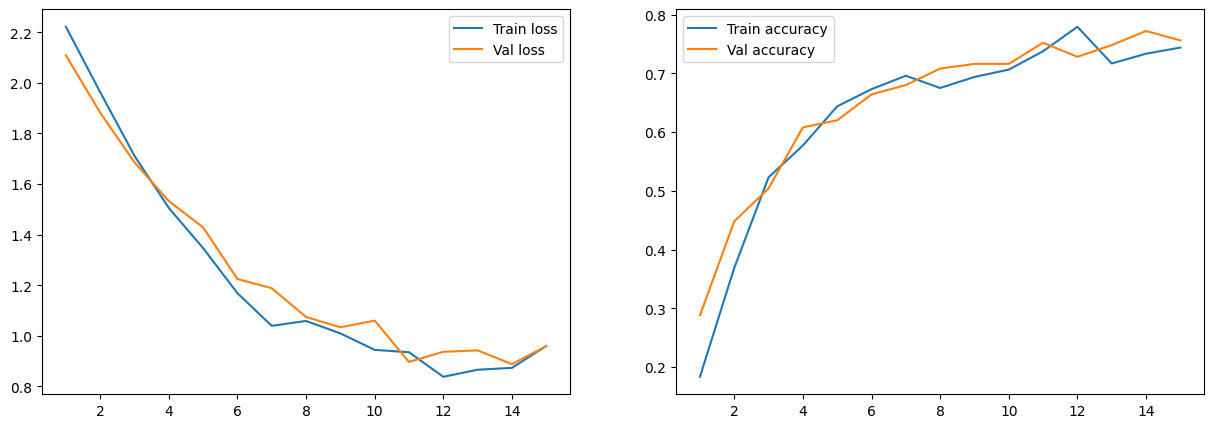

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([h["epoch"] for h in history], [h["train_loss"] for h in history], label="Train loss")
plt.plot([h["epoch"] for h in history], [h["val_loss"] for h in history], label="Val loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([h["epoch"] for h in history], [h["train_metrics"][0] for h in history], label="Train accuracy")
plt.plot([h["epoch"] for h in history], [h["val_metrics"][0] for h in history], label="Val accuracy")
plt.legend()
plt.show()